## Numerical Data
- Types
   1. Univariate - when we take help of the value of the column that has null values 
   2. Multivariate - here we take help of other variable/columns to fill the value

## Technique
- mean/ median
    1. Mean - it can be applied when we have a normally distributed data
    2. median - when we have skewed data
- Arbitary value ( koi bhi value fill karna)
- End of distribution
- random value imputation

## Benefit
- Simple
-  not reliable if data has more than 5% of missing value
## Disadvantage
- changes the shape of distribution
- extra outlier
- changes in relationship (cov/correlation)

## when to use
- MCAR
- <5% missing vaales

## Pandas (Fillna) Vs Scikit Learn (SimpleImputer)
- prefer Scikit learn

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [78]:
df = pd.read_csv(r"C:\Users\Admin\Documents\Jupyter Notebook\Machine Learning (CampusX)\Dataset\titanic_toy.csv")

In [79]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [80]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [81]:
df.shape

(891, 4)

In [117]:
X = df.drop(['Survived'],axis=1)
y = df['Survived']

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [84]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=128)

In [85]:
X_train.shape,X_test.shape

((623, 3), (268, 3))

In [86]:
X_train.isnull().mean()

Age       0.197432
Fare      0.048154
Family    0.000000
dtype: float64

In [87]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [88]:
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)
X_train['Median_Age'] = X_train['Age'].fillna(median_age)

X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)
X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)

In [89]:
X_train.sample(5)

,Age,Fare,Family,Age_mean,Median_Age,Fare_mean,Fare_median
856,45.0,164.8667,2,45.00000,45.0,164.8667,164.8667
564,NaN,8.0500,0,29.01034,28.0,8.0500,8.0500
862,48.0,25.9292,0,48.00000,48.0,25.9292,25.9292
50,7.0,39.6875,5,7.00000,7.0,39.6875,39.6875
433,17.0,7.1250,0,17.00000,17.0,7.1250,7.1250


In [90]:
print("Varience of age in original data is:",X_train['Age'].var())
print("Variance of age for mean is: ",X_train['Age_mean'].var())
print("Variance of age for median is:", X_train['Median_Age'].var())

print("Varience of fare in original data is:", X_train['Fare'].var())
print("Varience of fare for mean is:", X_train['Fare_mean'].var())
print("Variance of fare for median is:", X_train['Fare_median'].var())

Varience of age in original data is: 200.16845900240477
Variance of age for mean is:  160.58530714180063
Variance of age for median is: 160.74731339540548
Varience of fare in original data is: 2900.2409184492994
Varience of fare for mean is: 2760.3579159517444
Variance of fare for median is: 2777.0016494185816


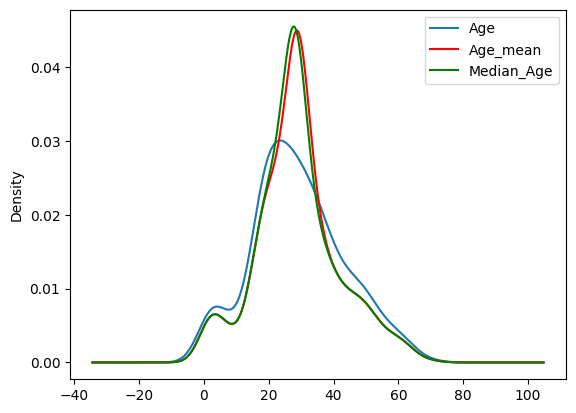

In [91]:
fig = plt.figure()
ax =fig.add_subplot()

## orginal data
X_train['Age'].plot(kind='kde',ax=ax)

## Mean
X_train['Age_mean'].plot(kind='kde',ax=ax,color='r')

#median
X_train['Median_Age'].plot(kind='kde',ax=ax,color='g')

## add legends
lines,labels =ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

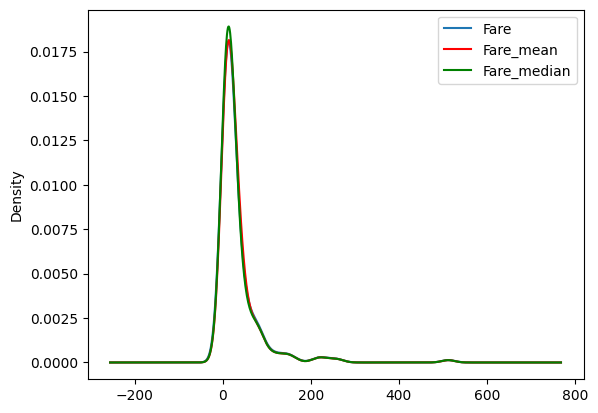

In [92]:
fig = plt.figure()
ax =fig.add_subplot()

## orginal data
X_train['Fare'].plot(kind='kde',ax=ax)

## Mean
X_train['Fare_mean'].plot(kind='kde',ax=ax,color='r')

#median
X_train['Fare_median'].plot(kind='kde',ax=ax,color='g')

## add legends
lines,labels =ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [93]:
X_train.cov()

,Age,Fare,Family,Age_mean,Median_Age,Fare_mean,Fare_median
Age,200.168459,100.509104,-6.389653,200.168459,200.168459,95.429334,95.114862
Fare,100.509104,2900.240918,14.376771,80.437902,82.609506,2900.240918,2900.240918
Family,-6.389653,14.376771,2.253725,-5.126105,-5.065287,13.683357,13.820299
Age_mean,200.168459,80.437902,-5.126105,160.585307,160.585307,76.558260,76.305975
Median_Age,200.168459,82.609506,-5.065287,160.585307,160.747313,78.625125,78.344294
Fare_mean,95.429334,2900.240918,13.683357,76.558260,78.625125,2760.357916,2760.357916
Fare_median,95.114862,2900.240918,13.820299,76.305975,78.344294,2760.357916,2777.001649


In [94]:
X_train.corr()

,Age,Fare,Family,Age_mean,Median_Age,Fare_mean,Fare_median
Age,1.000000,0.124273,-0.311769,1.000000,1.000000,0.120904,0.120080
Fare,0.124273,1.000000,0.176078,0.118131,0.121261,1.000000,1.000000
Family,-0.311769,0.176078,1.000000,-0.269454,-0.266123,0.173484,0.174694
Age_mean,1.000000,0.118131,-0.269454,1.000000,0.999496,0.114989,0.114266
Median_Age,1.000000,0.121261,-0.266123,0.999496,1.000000,0.118034,0.117259
Fare_mean,0.120904,1.000000,0.173484,0.114989,0.118034,1.000000,0.996999
Fare_median,0.120080,1.000000,0.174694,0.114266,0.117259,0.996999,1.000000


<Axes: >

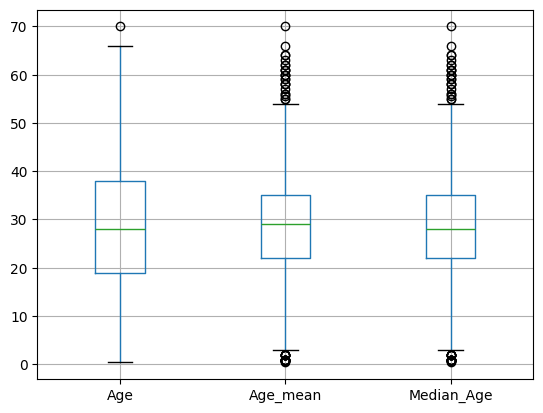

In [95]:
X_train[['Age','Age_mean','Median_Age']].boxplot()

<Axes: >

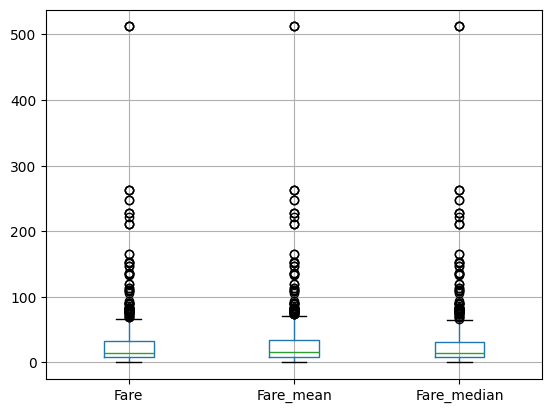

In [96]:
X_train[['Fare','Fare_mean','Fare_median']].boxplot()

## Using Sklearn

In [137]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.3)

In [138]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [139]:
from sklearn.compose import ColumnTransformer

In [140]:
trf = ColumnTransformer([
    ('age',imputer1,['Age']),
    ('fare',imputer2,['Fare'])
],remainder='passthrough')    

In [141]:
trf.fit(X_train)

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('age', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('fare', SimpleImputer(), ['Fare'])])

In [142]:
trf.named_transformers_['age'].statistics_

array([29.])

In [143]:
trf.named_transformers_['fare'].statistics_

array([32.42773237])

In [144]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [145]:
X_train

array([[51.    , 26.55  ,  0.    ],
       [49.    , 76.7292,  1.    ],
       [ 1.    , 46.9   ,  7.    ],
       ...,
       [29.    ,  7.7333,  0.    ],
       [36.    , 17.4   ,  1.    ],
       [60.    , 39.    ,  2.    ]])